# i. Perkenalan
>Bab pengenalan harus diisi dengan identitas, query yang telah kalian buat pada Google Cloud Platform!, dan objective yang ingin dicapai.

Nama : Nailina Farah

Batch : FTDS_RMT_28

Dataset : credit-card-information (FROM 'ftds-hacktiv8-project.phase1_ftds_028_rmt.credit-card-information')

Problem Statement : Membuat model clustering untuk melakukan Customer Segmentation dari data penggunaan kartu kredit 6 bulan terakhir sebuah bank. Model clustering akan menggunakan K-Means dengan 3 teknik berbeda yaitu elbow, silhoutte score, dan silhoutte plot untuk mendapatkan jumlah cluster yang paling baik dalam model.

Objective: Membuat model clustering menggunakan algoritma K-Means untuk melakukan Customer Segmentation dari data penggunaan kartu kredit 6 bulan terakhir sebuah bank, dengan menggunakan metode elbow, silhouette score, dan silhouette plot untuk menentukan jumlah cluster yang optimal, dalam waktu satu minggu setelah mendapatkan data. 

# ii Query SQL
>Tulis query yang telah dibuat untuk mengambil data dari Google Cloud Platform di bagian ini.

```sql
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_028_rmt.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0; -- hanya data genap sesuai no batch (028)
```

# iii. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import pickle
import json

# iv. Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

## Informasi Data (Deskripsi Kolom)
`CUST_ID` : (INT64) Identification of Credit Card holder

`BALANCE` : (FLOAT64) Balance amount left in their account to make purchases

`BALANCE_FREQUENCY`: (FLOAT64) How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

`PURCHASES`: (FLOAT64) Amount of purchases made from account

`ONEOFF_PURCHASES`: (FLOAT64) Maximum purchase amount done in one-go

`INSTALLMENTS_PURCHASES` : (FLOAT64) Amount of purchase done in installment

`CASH_ADVANCE`: (FLOAT64) Cash in advance given by the user

`PURCHASES_FREQUENCY`: (FLOAT64) How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

`ONEOFF_PURCHASES_FREQUENCY` : (FLOAT64) How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

`PURCHASES_INSTALLMENTS_FREQUENCY` : (FLOAT64) How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

`CASH_ADVANCE_FREQUENCY` : (FLOAT64) How frequently the cash in advance being paid 

`CASH_ADVANCE_TRX` : (INT64) Number of Transactions made with 'Cash in Advanced'

`PURCHASES_TRX` : (INT64) Numbe of purchase transactions made

`CREDIT_LIMIT` : (FLOAT64) Limit of Credit Card for user

`PAYMENTS` : (FLOAT64) Amount of Payment done by user

`MINIMUM_PAYMENTS` : (FLOAT64) Minimum amount of payments made by user

`PRC_FULL_PAYMENT` : (FLOAT64) Percent of full payment paid by user

`TENURE` : (INT64) Tenure of credit card service for user

In [2]:
# Load dataset
df_ori = pd.read_csv('P1G6_Set_1_nailina_farah.csv')

# Duplicate data ori
df = df_ori.copy()

In [3]:
# show 10 data teratas
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [4]:
# show 10 data terakhir
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [5]:
# Check Dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Data tersebut memiliki:
- 4475 baris data
- 18 kolom
- 14 kolom bertipe float dan 4 kolom bertipe integer

In [6]:
# Check Dataset 2
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Dari hasil terdapat 158 missing value pada kolom minimun_payments dan 1 missing value pada credit_limit.

In [7]:
# Check Dataset 3
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


Mendeskripsi data numerik sejumlah 18 kolom bernilai float dan integer didapatkan nilai count, mean, std, min, 25%, 50%, 75%, dan max dengan rentang yang berbeda.

In [8]:
# Memilih hanya kolom-kolom numerik
numeric_data = df.select_dtypes(include=['int', 'float'])

# Menampilkan nilai skew untuk setiap kolom numerik
skewness = numeric_data.skew()

skewness

CUST_ID                              0.000000
BALANCE                              2.456621
BALANCE_FREQUENCY                   -2.020309
PURCHASES                            8.987052
ONEOFF_PURCHASES                    10.140059
INSTALLMENTS_PURCHASES               8.116887
CASH_ADVANCE                         4.739678
PURCHASES_FREQUENCY                  0.061598
ONEOFF_PURCHASES_FREQUENCY           1.523455
PURCHASES_INSTALLMENTS_FREQUENCY     0.510288
CASH_ADVANCE_FREQUENCY               1.823380
CASH_ADVANCE_TRX                     4.752780
PURCHASES_TRX                        4.480452
CREDIT_LIMIT                         1.545078
PAYMENTS                             6.040773
MINIMUM_PAYMENTS                    12.357860
PRC_FULL_PAYMENT                     1.911650
TENURE                              -2.932822
dtype: float64

Dilihat dari hasil, kolom yang memiliki distribusi normal hanya CUST_ID dan PURCHASES_FREQUENCY.

# v. Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Sebelum melakukan clustering, saya akan melakukan EDA dengan melihat beberapa visualisasi.

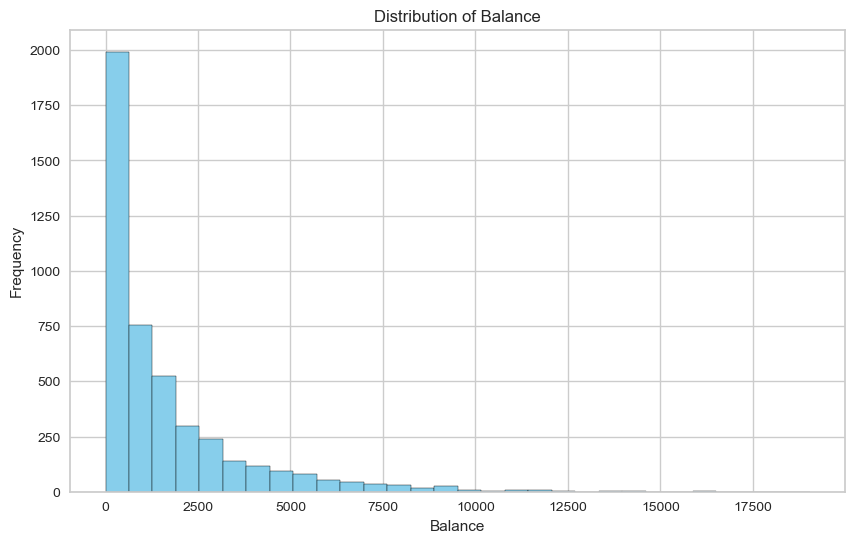

In [9]:
# Visualisasi 1 : Distribusi Feature Balance
plt.figure(figsize=(10, 6))
plt.hist(df_ori['BALANCE'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Visualisasi 1 yaitu distribusi dari feature Balance. Grafik tersebut memperlihatkan bahwa semakin tinggi balance, maka semakin rendah frekuensinya yang menandakan bahwa banyak pengguna kartu kredit yang memiliki jumlah saldo tidak begitu banyak.

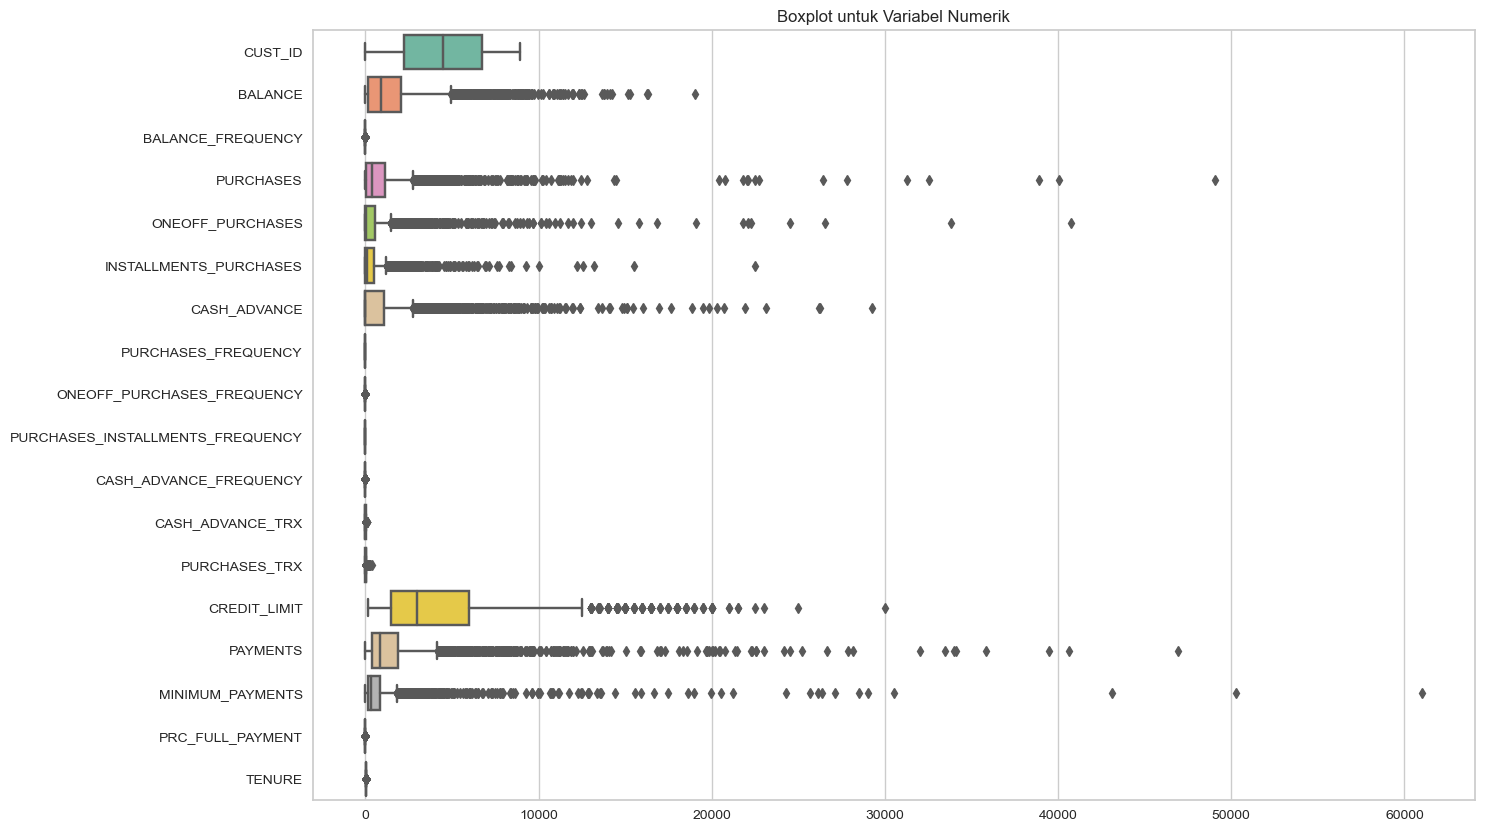

In [10]:
# Visualisasi 2 : Boxplot setiap feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_ori, orient="h", palette="Set2")
plt.title('Boxplot untuk Variabel Numerik')
plt.show()

Visualisasi 2 yaitu boxplot setiap feature yang memperlihatkan bahwa masih banyak outlier pada beberapa feature sehingga memang perlu dilakukan handling outlier.

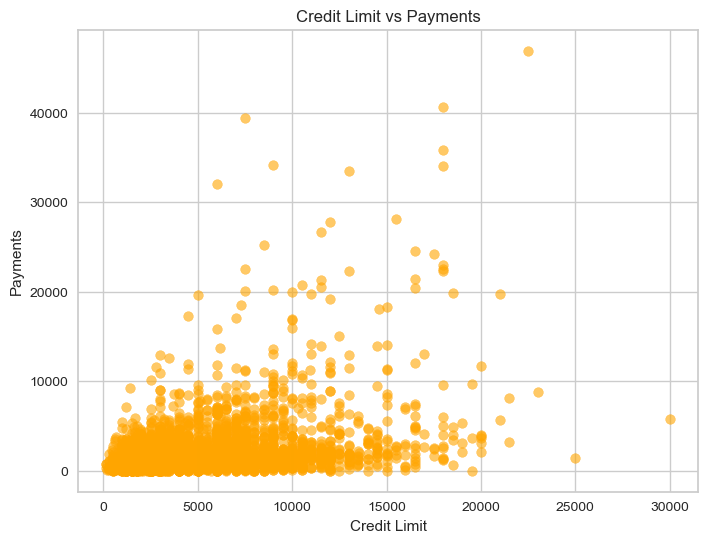

In [11]:
# Visualisasi 3: Hubungan Kredit limit dan Payments
plt.figure(figsize=(8, 6))
plt.scatter(df_ori['CREDIT_LIMIT'], df_ori['PAYMENTS'], color='orange', alpha=0.6)
plt.title('Credit Limit vs Payments')
plt.xlabel('Credit Limit')
plt.ylabel('Payments')
plt.show()

Visualisasi 3 yaitu hubungan antara credit limit dan payments yang menunjukkan bahwa pembayaran tertinggi yang dilakukan pengguna malah berada pada rentang credit limit 20000 hingga 25000. Sedangkan pada pengguna yang memiliki credit limit 25000 hingga 30000 hanya berada pada rentang payments dibawah 10000. Hal tersebut mungkin terjadi karena pengguna rentang credit limit 20000 hingga 25000 mungkin lebih aktif dalam menggunakan kartu kredit mereka dan mampu melakukan pembayaran yang signifikan.

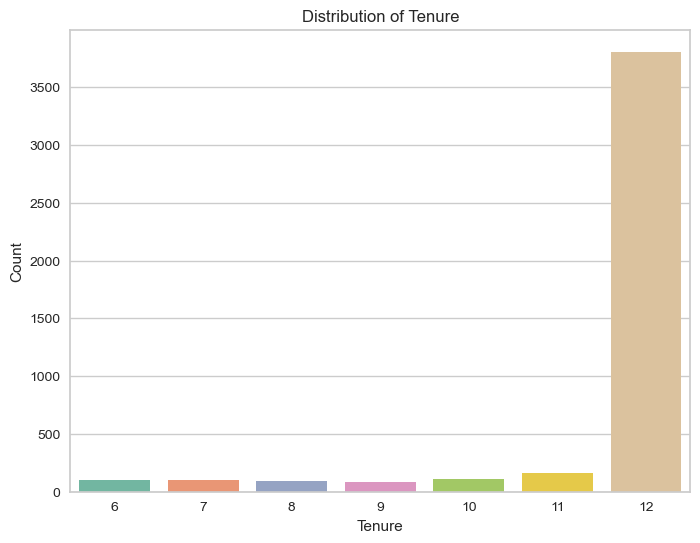

In [12]:
# Visualisasi 4 : Distribusi Feature Tenure
plt.figure(figsize=(8, 6))
sns.countplot(x='TENURE', data=df_ori, palette='Set2')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

Visualisasi 4 yaitu distribusi tenure dimana grafik tersebut menunjukkan bahwa masa layanan kartu kredit untuk pengguna dominan berada pada angka 12.

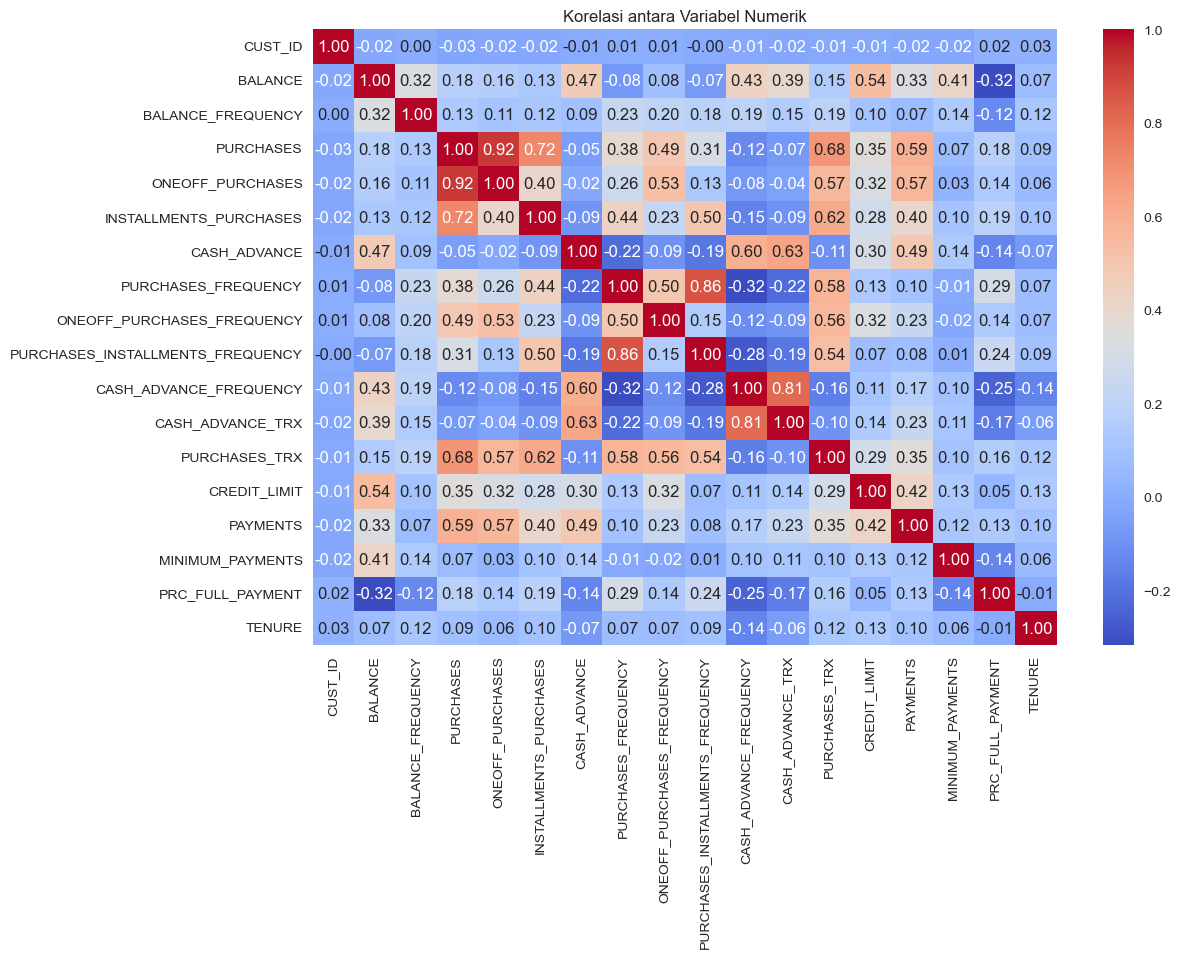

In [13]:
# Visualisasi 5 : Korelasi antar feature
plt.figure(figsize=(12, 8))
sns.heatmap(df_ori.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Numerik')
plt.show()

Visualisasi 5 yaitu korelasi antar feature dimana pada gambar tersebut menunjukkan ada feature yang sangat berkorelasi yaitu PURCHASES dan ONEOFF_PURCHASES dengan nilai 0,92. Kemudian feature PURCHASES_FREQUENCY dan PURCHASES_INSTALLMENTS_FREQUENCY juga berkorelasi kuat dengan nilai 0,86. Lalu CASH_ADVANCE_FREQUENCY dan CASH_ADVANCE_TRX dengan nilai 0,81.

# vi. Feature Engineering
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Mengambil data inference dari data asli

In [14]:
# menyimpan 3 data random dari data asli untuk digunakan sebagai data inference ke dalam variabel data_inf (3 data karena jumlah cluster 3)
data_inf = df_ori.sample(3, random_state=0)

# menghapus data inference dari df
df_ori.drop(data_inf.index, inplace=True)

# melakukan reset index untuk data_inf dan df
df_ori.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# menghapus kolom cust_id di data_inf karena tidak mengandung informasi yang akan diambil
data_inf.drop(['CUST_ID'], axis=1, inplace=True)

# menyimpan data_inf
data_inf.to_csv('data_inf.csv',index=False)

## Cek Duplikasi

In [15]:
# cek duplikasi sebelum drop duplikasi
df.duplicated().sum()

0

Tidak terdapat data duplikat. Namun kolom CUST_ID akan didrop karena tidak ada info yang akan diambil dari kolom tersebut.

In [16]:
# drop kolom cust_id
df.drop(columns = 'CUST_ID', inplace = True)

In [17]:
df.shape

(4475, 17)

Sehingga sekarang hanya tersisa 17 kolom dengan 4475 baris.

## Define Jenis Kolom

In [18]:
# define jenis kolom
num_cols= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
           'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
           'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
           'PRC_FULL_PAYMENT', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']
cat_cols= ['TENURE'] 

# membuat df sesuai jenis kolom
df_num = df[num_cols]
df_cat = df[cat_cols]

Dalam kasus ini, saya hanya menganggap TENURE sebagai kategorikal karena valuenya menunjukkan masa layanan kartu kredit untuk pengguna. Meskipun nilainya diskrit, variabel ini lebih cenderung dianggap sebagai kategorikal karena mewakili rentang masa layanan tertentu (misalnya, 6 bulan, 7 bulan, dst.). Feature lainnya, seperti FREKUENSI karena memiliki value rentang 0-1 bukan nilai 0 dan 1 akan tetap saya anggap numerikal.

## Handling Missing Value

In [19]:
# cek missing value
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [20]:
# Cek skew pada kolom yang terdapat missing 
print('Nilai Skew pada Minimum_Payments adalah: ', df['MINIMUM_PAYMENTS'].skew())
print('Nilai Skew pada Credit_Limit adalah: ', df['CREDIT_LIMIT'].skew())

Nilai Skew pada Minimum_Payments adalah:  12.357860274482807
Nilai Skew pada Credit_Limit adalah:  1.5450779677462632


Karena kolom MINIMUN_PAYMENTS sangat skew dan credit_limit juga skew, maka akan dilakukan imputasi dengan median untuk handling missing value.

In [21]:
# Imputasi nilai median ke dalam kolom MINIMUM_PAYMENTS dan CREDIT_LIMIT
df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']] = df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].fillna(df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].median())


In [22]:
# cek missing value setelah handling
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak terdapat missing value.

## Handling Outlier

Karena pada EDA terdapat beberapa feature yang outliernya sangat banyak, maka perlu dicek dan dilakukan handling outlier.

In [23]:
# melihat skew
df.skew()

BALANCE                              2.456621
BALANCE_FREQUENCY                   -2.020309
PURCHASES                            8.987052
ONEOFF_PURCHASES                    10.140059
INSTALLMENTS_PURCHASES               8.116887
CASH_ADVANCE                         4.739678
PURCHASES_FREQUENCY                  0.061598
ONEOFF_PURCHASES_FREQUENCY           1.523455
PURCHASES_INSTALLMENTS_FREQUENCY     0.510288
CASH_ADVANCE_FREQUENCY               1.823380
CASH_ADVANCE_TRX                     4.752780
PURCHASES_TRX                        4.480452
CREDIT_LIMIT                         1.545423
PAYMENTS                             6.040773
MINIMUM_PAYMENTS                    12.569714
PRC_FULL_PAYMENT                     1.911650
TENURE                              -2.932822
dtype: float64

Dari hasil tersebut, kolom yang memiliki skew ekstrem (>1 atau <-1) adalah:
- BALANCE
- BALANCE_FREQUENCY
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENTS_PURCHASES
- CASH_ADVANCE
- ONEOFF_PURCHASES_FREQUENCY
- CASH_ADVANCE_FREQUENCY
- CASH_ADVANCE_TRX
- PURCHASES_TRX
- CREDIT_LIMIT
- PAYMENTS
- MINIMUM_PAYMENTS
- PRC_FULL_PAYMENT

Kolom yang memiliki skew biasa (0.5 s/d 1 atau -0.5 s/d -1) adalah:
- PURCHASES_INSTALLMENTS_FREQUENCY

Kolom TENURE tidak akan saya handling outliernya karena nilainya real bukan karena kesalahan.

In [24]:
# KOLOM SKEW EKSTREM
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE_TRX', 
                              'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 
                              'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'PURCHASES_TRX']
for col in columns_to_cap_with_median:
    df[col] = replace_outliers_with_median(df[col])

# Tampilkan DataFrame df setelah penggantian outlier 
print(df)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           1.000000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           1.000000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.0

In [25]:
# KOLOM SKEW BIASA
# Fungsi untuk mengganti nilai outlier dengan median
def replace_outliers_with_median(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = np.median(data)
    data = np.where((data < lower_bound) | (data > upper_bound), median, data)
    return data

# Loop melalui kolom-kolom yang perlu dicapping dengan median
columns_to_cap_with_median = ['PURCHASES_INSTALLMENTS_FREQUENCY']
for col in columns_to_cap_with_median:
    df[col] = replace_outliers_with_median(df[col])

# Tampilkan DataFrame df setelah penggantian outlier 
print(df)

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       16.581535           1.000000     200.00              0.00   
1      943.584041           0.875000     103.00            103.00   
2        1.979916           1.000000      80.00             80.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1595.93   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.0

In [26]:
# melihat skew
df.skew()

BALANCE                             1.682723
BALANCE_FREQUENCY                  -2.611875
PURCHASES                           1.833556
ONEOFF_PURCHASES                    2.005303
INSTALLMENTS_PURCHASES              1.863944
CASH_ADVANCE                        2.019076
PURCHASES_FREQUENCY                 0.061598
ONEOFF_PURCHASES_FREQUENCY          1.523455
PURCHASES_INSTALLMENTS_FREQUENCY    0.510288
CASH_ADVANCE_FREQUENCY              1.539525
CASH_ADVANCE_TRX                    1.931807
PURCHASES_TRX                       1.763221
CREDIT_LIMIT                        1.378524
PAYMENTS                            1.773716
MINIMUM_PAYMENTS                    1.892761
PRC_FULL_PAYMENT                    2.596180
TENURE                             -2.932822
dtype: float64

Setelah dihandling terlihat bahwa skew pada kolom sudah lebih mendekati normal dan bahkan ada yang normal.

## VIF

Melakukan VIF untuk drop feature yang memiliki multikolinearitas.

In [27]:
# Membuat fungsi untuk menghitung VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Menghitung VIF untuk setiap kolom
vif_result = calculate_vif(df)
print(vif_result)

                             Feature        VIF
0                            BALANCE   4.059760
1                  BALANCE_FREQUENCY  64.551231
2                          PURCHASES   3.978792
3                   ONEOFF_PURCHASES   2.537403
4             INSTALLMENTS_PURCHASES   2.963437
5                       CASH_ADVANCE   1.995216
6                PURCHASES_FREQUENCY  24.397531
7         ONEOFF_PURCHASES_FREQUENCY   4.835041
8   PURCHASES_INSTALLMENTS_FREQUENCY  15.391893
9             CASH_ADVANCE_FREQUENCY   3.720102
10                  CASH_ADVANCE_TRX   3.253034
11                     PURCHASES_TRX   4.304531
12                      CREDIT_LIMIT   3.581228
13                          PAYMENTS   2.717923
14                  MINIMUM_PAYMENTS   3.922946
15                  PRC_FULL_PAYMENT   1.338411
16                            TENURE  63.420298


Berdasarkan hasil tersebut, saya akan memilih feature yang tidak memiliki multikolinearitas (VIF < 5), yaitu:
1. BALANCE
2. PURCHASES
3. ONEOFF_PURCHASES
4. INSTALLMENTS_PURCHASES
5. CASH_ADVANCE
6. ONEOFF_PURCHASES_FREQUENCY
7. CASH_ADVANCE_FREQUENCY
8. CASH_ADVANCE_TRX
9. PURCHASES_TRX
10. CREDIT_LIMIT
11. PAYMENTS
12. MINIMUM_PAYMENTS
13. PRC_FULL_PAYMENT

maka kolom yang lain akan didrop sementara.

In [28]:
# define num cols yang tidak memiliki multikolinearitas untuk scaling dan PCA
num_cols_nonmulti = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                     'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
                     'PRC_FULL_PAYMENT', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX']

Kemudian feature ini yang akan dilakukan scaling dan PCA

## Scaling

Menggunakan standard scaler karena telah dihandling outlier

In [29]:
# Scaling dengan standardscaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols_nonmulti])

Setelah dilakukan scaling, data sudah siap melakukan PCA.

## PCA

In [30]:
# melakukan PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [31]:
# Check the number of features if we want to retain 95 % of the information

cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

11

Dari perhitungan tersebut, 11 feature adalah angka kolom yang dibutuhkan untuk menyimpan 95% informasi

In [32]:
# Let's train the model with 95 % of the original dataset information

pca_n = PCA(n_components=11)
pca_n.fit(df_scaled)

df_scaled_pca = pca_n.transform(df_scaled)

Kemudian digabungkan menjadi dataframe baru.

In [33]:
# concate
df_scaled_pca = pd.DataFrame(df_scaled_pca, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11']) # sesuai dengan perhitungan dibutuhkan 11 PCA
df_final = pd.concat([df_scaled_pca, df_cat], axis=1)

# Tampilkan DataFrame df_final
print(df_final)

          PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0    -0.656741 -2.102690 -0.579162 -0.029379 -0.511915  0.067448 -0.080848   
1    -0.740485 -1.686653 -0.906946 -0.397933 -0.149708 -0.040775 -0.419117   
2    -0.680050 -2.040677 -0.707630 -0.523050 -0.128911  0.045995 -0.087136   
3    -0.080070 -1.708170 -0.579618 -1.111962 -0.207780  0.002469 -0.465627   
4     0.884173 -0.875146 -0.706319 -1.958497 -0.239369 -0.376323 -1.003062   
...        ...       ...       ...       ...       ...       ...       ...   
4470 -2.802759  0.612495  2.124861 -0.727584 -0.421652 -0.030811  0.168301   
4471 -2.746809  2.107332  3.169291 -0.224232  0.615696  2.181054 -0.496914   
4472 -0.986827  3.768942  0.662928 -1.184314  0.076649 -0.639031  1.668929   
4473 -0.388698  5.258525 -0.308302 -1.262107 -0.297468 -2.067650 -1.877885   
4474 -0.845650  2.841911  2.146605  0.983779 -0.897898  0.916250 -0.814863   

          PCA8      PCA9     PCA10     PCA11  TENURE  
0     0.

In [34]:
# melihat informasi df_final
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA1    4475 non-null   float64
 1   PCA2    4475 non-null   float64
 2   PCA3    4475 non-null   float64
 3   PCA4    4475 non-null   float64
 4   PCA5    4475 non-null   float64
 5   PCA6    4475 non-null   float64
 6   PCA7    4475 non-null   float64
 7   PCA8    4475 non-null   float64
 8   PCA9    4475 non-null   float64
 9   PCA10   4475 non-null   float64
 10  PCA11   4475 non-null   float64
 11  TENURE  4475 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 419.7 KB


Berikut adalah df_final yang sudah dilakukan PCA terdiri dari 4475 baris dan 12 kolom, dimana 10 kolom PCA dan 1 kolom kategorikal.

# vii. Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Menggunakan K-Means untuk mencari n cluster terbaik.

## Elbow


Metode Elbow digunakan dalam algoritma clustering, khususnya K-Means, untuk menentukan jumlah optimal cluster. Cara kerjanya adalah dengan mengamati variasi dalam penjelasan data sebagai fungsi dari jumlah cluster yang berbeda. Nilai yang ditemukan biasanya menunjukkan di mana penambahan cluster tidak memberikan penurunan yang signifikan dalam variasi data, yang disebut "elbow point". Kelebihannya adalah metode ini relatif mudah dipahami dan diimplementasikan, namun kelemahannya adalah terkadang sulit untuk menentukan dengan pasti di mana "elbow" sebenarnya terletak, karena penurunan dalam variasi data mungkin kurang jelas dan bersifat subjektif.

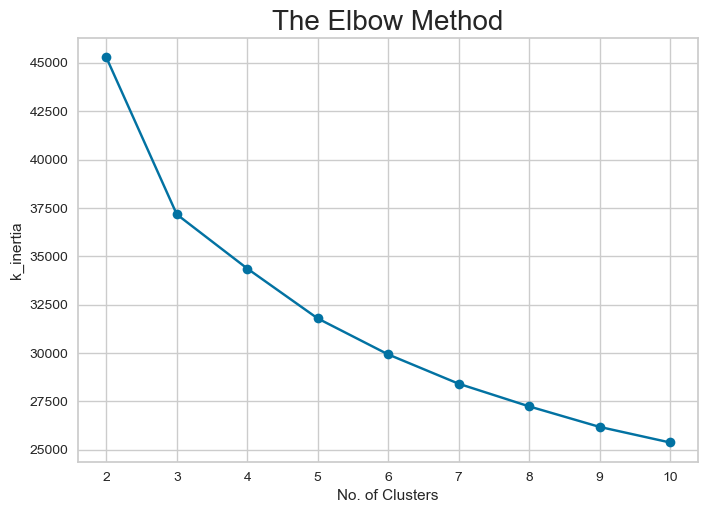

In [35]:
k_inertia = []
#membuat iterasi dari 2-10 untuk nilai k terbaik
for i in range(2, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
    km.fit(df_scaled_pca)
    k_inertia.append(km.inertia_)

plt.plot(range(2, 11), k_inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('k_inertia')
plt.show()

Dari Elbow, secara subjektif saya menilai K terbaik adalah 6. Namun, akan dilakukan 2 teknik lainnya untuk perbandingan dan agar hasil lebih baik.

## Silhouette_score

In [36]:
for n_clusters in range(2, 16):
  clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++',
                     max_iter = 300, n_init = 10,
                     random_state = 3)
  cluster_labels = clusterer.fit_predict(df_scaled_pca)

  # The silhouette_score gives the average value for all the samples.
  # This gives a perspective into the density and separation of the formed clusters
  silhouette_avg = silhouette_score(df_scaled_pca, cluster_labels)
  print("For n_clusters =", n_clusters,
        "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.26840600063995307
For n_clusters = 3 The average silhouette_score is : 0.24887600336243584
For n_clusters = 4 The average silhouette_score is : 0.23239927357100112
For n_clusters = 5 The average silhouette_score is : 0.22544738007908602
For n_clusters = 6 The average silhouette_score is : 0.22419844069969147
For n_clusters = 7 The average silhouette_score is : 0.2127942419083301
For n_clusters = 8 The average silhouette_score is : 0.21143676506558207
For n_clusters = 9 The average silhouette_score is : 0.2101264154311314
For n_clusters = 10 The average silhouette_score is : 0.16587110985277873
For n_clusters = 11 The average silhouette_score is : 0.16118846783295818
For n_clusters = 12 The average silhouette_score is : 0.19900137572801965
For n_clusters = 13 The average silhouette_score is : 0.16047127949810536
For n_clusters = 14 The average silhouette_score is : 0.1583262284677
For n_clusters = 15 The average silhouette_score is 

Apabila dilihat dari score, nilai terbaik adalah n_cluster 2. Namun, tetap saya akan melakukan teknik plot untuk melihat n_cluster terbaik.

## Silhoutte Plot Yellow Brick

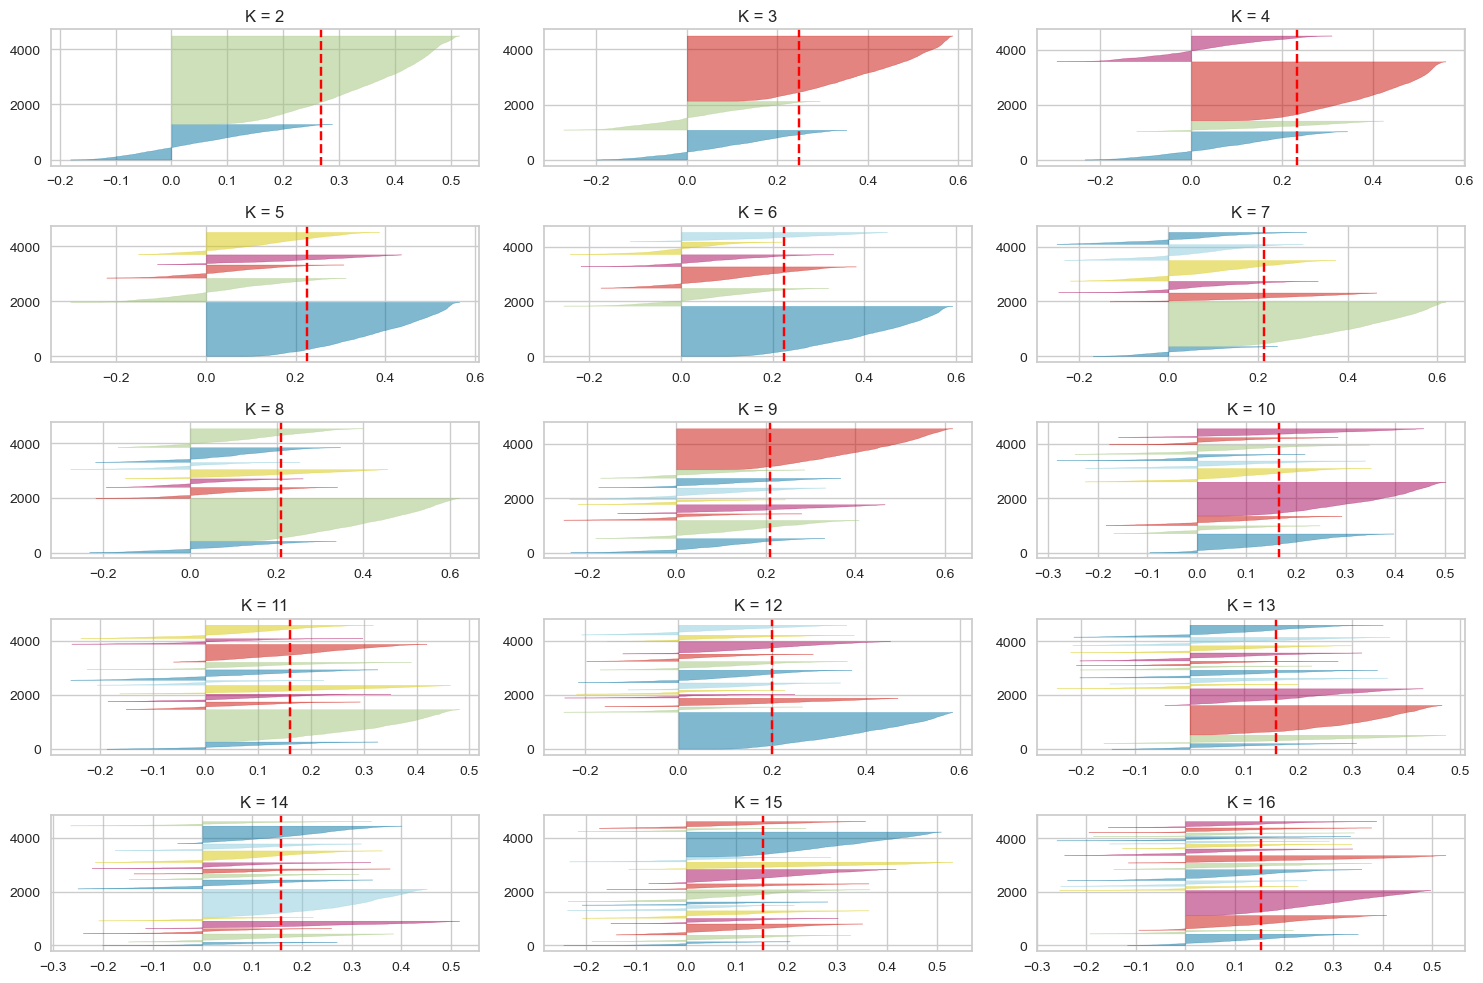

In [37]:
fig, axes = plt.subplots(5, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

Dilihat dari plot, n_cluster = 2 menunjukkan perbedaan yang signifikan (lebar data berbeda jauh), sehingga saya memutuskan untuk menggunakan n_cluster = 3 karena n_cluster = 4 keatas juga tidak begitu baik terutama saat di cek visualisasi 2D.

# viii. Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [38]:
# Train with optimal number of clusters

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 3)
pred = km.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 0, 0, 0])

Oleh karena itu, saya melakukan training model KMeans dengan n_cluster = 3.

# ix. Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

Hasil cluster yang telah dibuat diinsert sebagai feature dalam dataframe df.

In [39]:
# Insert clustering result into original dataset

df['cluster'] = pred
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,16.581535,1.000000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0.0,2.0,1200.0,0.000000,309.854995,0.000000,8,2
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,215.325023,410.484825,0.000000,8,2
2,1.979916,1.000000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,0.000000,309.854995,0.000000,8,2
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1000.0,258.032630,151.696433,0.000000,8,2
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0.0,1.0,1500.0,397.090516,227.143184,0.000000,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9.0,0.0,1200.0,1379.635287,271.364415,0.090909,11,0
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7.0,0.0,4150.0,4372.148648,241.645387,0.090909,11,0
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9.0,20.0,10100.0,1039.000037,886.050237,0.000000,11,0
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,0.0,25.0,6000.0,905.844846,2376.919568,0.090909,11,0


Berikut adalah visualisasi clustering dengan jumlah 3.

<Axes: >

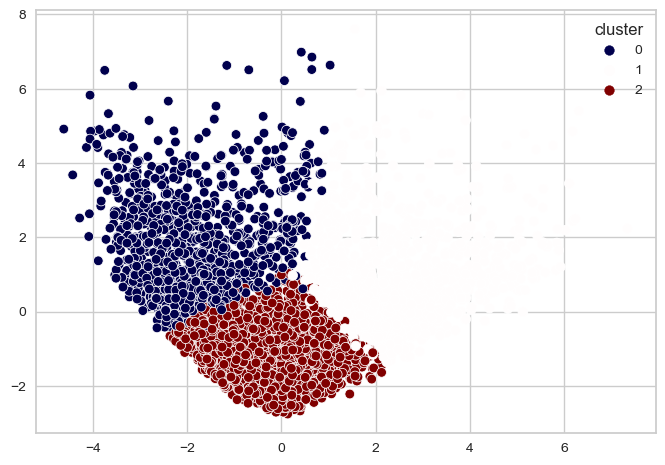

In [40]:
# Visualisasi after clustering 1: Cluster visualization in 2D

pca_2d = PCA(n_components=3)
pca_2d.fit(df_scaled_pca)

df_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df['cluster'], palette='seismic')

In [41]:
# Jumlah data dalam cluster 0
jumlah_cluster_0 = df['cluster'].value_counts()[0]

# Jumlah data dalam cluster 1
jumlah_cluster_1 = df['cluster'].value_counts()[1]

# Jumlah data dalam cluster 2
jumlah_cluster_2 = df['cluster'].value_counts()[2]

print("Jumlah data dalam cluster 0:", jumlah_cluster_0)
print("Jumlah data dalam cluster 1:", jumlah_cluster_1)
print("Jumlah data dalam cluster 2:", jumlah_cluster_2)

Jumlah data dalam cluster 0: 1075
Jumlah data dalam cluster 1: 1038
Jumlah data dalam cluster 2: 2362


Dari hasil jumlah data setiap cluster, memang kurang balance. Namun, apabila dibandingkan jumlah cluster lain, n_cluster = 3 adalah yang paling ideal untuk saat ini dan didukung dengan visualisasi yang memperlihatkan pembagian yang jelas antar tiap cluster. Dalam memperlihatkan karakteristik setiap cluster, saya akan menggunakan describe dan explorasi lainnya.

In [42]:
# describe data keseluruhan
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000
mean,1357.094974,0.964468,675.476094,283.968337,272.474020,547.511249,0.490122,0.202614,0.364989,0.114320,2.120447,10.764246,4434.803634,1231.134042,501.505381,0.062227,11.516425,1.287598
std,1611.088659,0.087712,878.078539,487.251109,411.418949,981.469285,0.399874,0.298502,0.397336,0.166199,3.508406,13.033229,3535.137563,1241.812039,513.768080,0.140593,1.347819,0.827940
min,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,0.000000
25%,132.536353,1.000000,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,171.085397,0.000000,12.000000,1.000000
50%,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000,2.000000
75%,1879.404147,1.000000,956.305000,368.725000,391.990000,711.578822,0.916667,0.333333,0.750000,0.166667,3.000000,14.000000,6000.000000,1621.953287,644.739615,0.000000,12.000000,2.000000
max,7803.071972,1.000000,4337.190000,2311.830000,1932.390000,4383.296268,1.000000,1.000000,1.000000,0.714286,16.000000,65.000000,19500.000000,6409.769007,2648.004763,0.666667,12.000000,2.000000


In [43]:
# describe data dengan cluster = 0
df[df['cluster']==0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.0
mean,2821.275434,0.974163,300.614986,141.407795,119.513116,1635.830879,0.239907,0.096179,0.159777,0.320274,6.312558,4.480000,5563.488372,1565.965125,922.918893,0.029748,11.370233,0.0
std,1928.330621,0.070734,551.337035,305.663711,288.580199,1296.380640,0.334457,0.186894,0.298089,0.179025,4.351949,7.589584,3633.630088,1330.876638,639.086820,0.076720,1.513640,0.0
min,15.523256,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,17.401529,0.000000,6.000000,0.0
25%,1191.826176,1.000000,0.000000,0.000000,0.000000,406.871678,0.000000,0.000000,0.000000,0.166667,3.000000,0.000000,3000.000000,690.440169,374.314709,0.000000,12.000000,0.0
50%,2388.410501,1.000000,0.000000,0.000000,0.000000,1517.268703,0.000000,0.000000,0.000000,0.333333,6.000000,0.000000,5000.000000,1086.417545,749.955592,0.000000,12.000000,0.0
75%,4137.456388,1.000000,362.480000,113.380000,73.765000,2680.136822,0.416667,0.090909,0.166667,0.428571,9.500000,7.000000,7500.000000,2033.106043,1310.568197,0.000000,12.000000,0.0
max,7803.071972,1.000000,4248.350000,2118.420000,1813.400000,4383.296268,1.000000,1.000000,1.000000,0.714286,16.000000,53.000000,19000.000000,6344.618447,2648.004763,0.636364,12.000000,0.0


In [44]:
# describe data dengan cluster = 1
df[df['cluster']==1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.0
mean,1465.548912,0.975842,1769.663931,796.147254,581.313343,228.599942,0.856068,0.573104,0.597771,0.051413,0.851638,25.632948,6515.078823,2145.096984,493.909733,0.086164,11.796724,1.0
std,1572.928595,0.069219,1019.117200,671.570308,566.874178,625.387915,0.212161,0.320608,0.385683,0.112904,2.157526,15.755765,3947.500032,1434.999490,473.252340,0.164557,0.910725,0.0
min,6.793588,0.636364,8.400000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,300.000000,0.000000,3.197940,0.000000,6.000000,1.0
25%,289.384284,1.000000,1028.052500,29.990000,89.450000,0.000000,0.750000,0.333333,0.250000,0.000000,0.000000,12.000000,3500.000000,1023.605150,182.544870,0.000000,12.000000,1.0
50%,874.905296,1.000000,1628.950000,773.435000,415.050000,0.000000,1.000000,0.583333,0.666667,0.000000,0.000000,24.000000,6000.000000,1746.685072,302.156406,0.000000,12.000000,1.0
75%,2200.535849,1.000000,2426.305000,1301.065000,1010.375000,0.000000,1.000000,0.916667,1.000000,0.062500,0.000000,35.750000,9000.000000,2939.991446,667.662943,0.083333,12.000000,1.0
max,7611.152584,1.000000,4337.190000,2311.830000,1932.390000,4232.135689,1.000000,1.000000,1.000000,0.666667,16.000000,65.000000,19500.000000,6409.769007,2621.071099,0.666667,12.000000,1.0


In [45]:
# describe data dengan cluster = 2
df[df['cluster']==2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.0
mean,643.052137,0.955058,365.234229,123.769721,206.368074,192.340349,0.443182,0.088240,0.356087,0.048232,0.770110,7.090178,3006.919748,677.096385,313.048461,0.066490,11.459780,2.0
std,805.626640,0.100050,424.230453,242.978225,291.149125,422.962011,0.377837,0.170936,0.387733,0.082112,1.459922,7.613765,2511.776519,697.608560,315.610185,0.148778,1.410116,0.0
min,0.000000,0.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000,2.0
25%,40.473112,1.000000,49.325000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1200.000000,256.206493,140.471947,0.000000,12.000000,2.0
50%,257.215269,1.000000,252.000000,0.000000,84.145000,0.000000,0.348484,0.000000,0.166667,0.000000,0.000000,6.000000,2000.000000,479.265475,199.934086,0.000000,12.000000,2.0
75%,1072.130198,1.000000,532.857500,129.857500,313.332500,135.130176,0.833333,0.083333,0.750000,0.083333,1.000000,12.000000,4000.000000,831.048408,339.633737,0.000000,12.000000,2.0
max,6832.111113,1.000000,4116.000000,1499.000000,1833.340000,3947.583198,1.000000,1.000000,1.000000,0.666667,13.000000,56.000000,19500.000000,6322.388249,2621.829478,0.666667,12.000000,2.0


Dari feature-feature tersebut, untuk mempermudah saya akan melihat karakteristik pada 7 feature yang sekiranya akan merepresentasikan keunikan tiap cluster. Feature tersebut adalah BALANCE, PURCHASES, CASH_ADVANCE, PAYMENTS, MINIMUM_PAYMENTS, CREDIT_LIMIT, TENURE.

In [46]:
# Membuat DataFrame dengan mean per cluster
cluster_means = df.groupby('cluster').mean().round(2)[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'TENURE']]

# Menambahkan header untuk setiap kolom
cluster_means.columns = ['Balance', 'Purchases', 'Cash Advance', 'Payments', 'Minimum Payments', 'Credit Limit', 'Tenure']

# Menampilkan DataFrame sebagai tabel
print(cluster_means)

         Balance  Purchases  Cash Advance  Payments  Minimum Payments  \
cluster                                                                 
0        2821.28     300.61       1635.83   1565.97            922.92   
1        1465.55    1769.66        228.60   2145.10            493.91   
2         643.05     365.23        192.34    677.10            313.05   

         Credit Limit  Tenure  
cluster                        
0             5563.49   11.37  
1             6515.08   11.80  
2             3006.92   11.46  


Berikut adalah rangkuman karakteristik yang dihasilkan:

**Cluster 0:**
- Balance: Rata-rata saldo yang tersisa relatif tinggi, yaitu sekitar 2821.28.
- Purchases: Rata-rata jumlah pembelian rendah, sekitar 300.61.
- Cash Advance: Rata-rata jumlah uang muka yang tinggi, sekitar 1635.83.
- Payments: Rata-rata pembayaran tinggi, sekitar 1565.97.
- Minimum Payments: Rata-rata pembayaran minimum cukup tinggi, sekitar 922.92.
- Credit Limit: Rata-rata batas kartu kredit yang tinggi, sekitar 5563.49.
- Tenure: Rata-rata masa layanan kartu kredit sekitar 11.37 bulan.

**Cluster 1:**
- Balance: Rata-rata saldo yang tersisa sedang, yaitu sekitar 1465.55.
- Purchases: Rata-rata jumlah pembelian cukup tinggi, sekitar 1769.66.
- Cash Advance: Rata-rata jumlah uang muka yang rendah, sekitar 228.60.
- Payments: Rata-rata pembayaran yang tinggi, sekitar 2145.10.
- Minimum Payments: Rata-rata pembayaran minimum rendah, sekitar 493.91.
- Credit Limit: Rata-rata batas kartu kredit yang tinggi, sekitar 6515.08.
- Tenure: Rata-rata masa layanan kartu kredit sekitar 11.80 bulan.

**Cluster 2:**
- Balance: Rata-rata saldo yang tersisa rendah, yaitu sekitar 643.05.
- Purchases: Rata-rata jumlah pembelian rendah, sekitar 365.23.
- Cash Advance: Rata-rata jumlah uang muka yang rendah, sekitar 192.34.
- Payments: Rata-rata pembayaran rendah, sekitar 677.10.
- Minimum Payments: Rata-rata pembayaran minimum yang rendah, sekitar 313.05.
- Credit Limit: Rata-rata batas kartu kredit yang rendah, sekitar 3006.92.
- Tenure: Rata-rata masa layanan kartu kredit sekitar 11.46 bulan.

Agar lebih jelas, saya akan melakukan visualisasi.

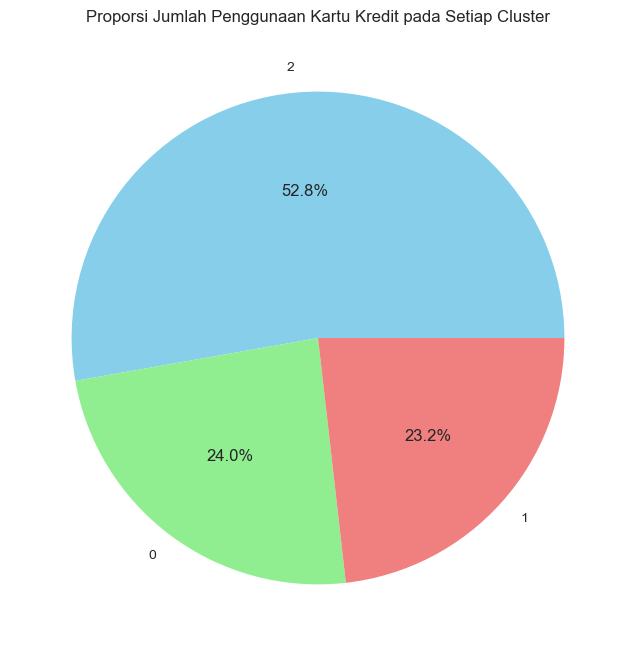

In [47]:
# Visualisasi after clustering 2: Proporsi Jumlah Penggunaan Kartu Kredit pada Setiap Cluster
plt.figure(figsize=(8, 8))
cluster_counts = df['cluster'].value_counts()
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporsi Jumlah Penggunaan Kartu Kredit pada Setiap Cluster')
plt.show()

Berikut adalah pie chart jumlah setiap cluster, dimana cluster 2 memiliki persentase jumlah paling tinggi yaitu 52,8%.

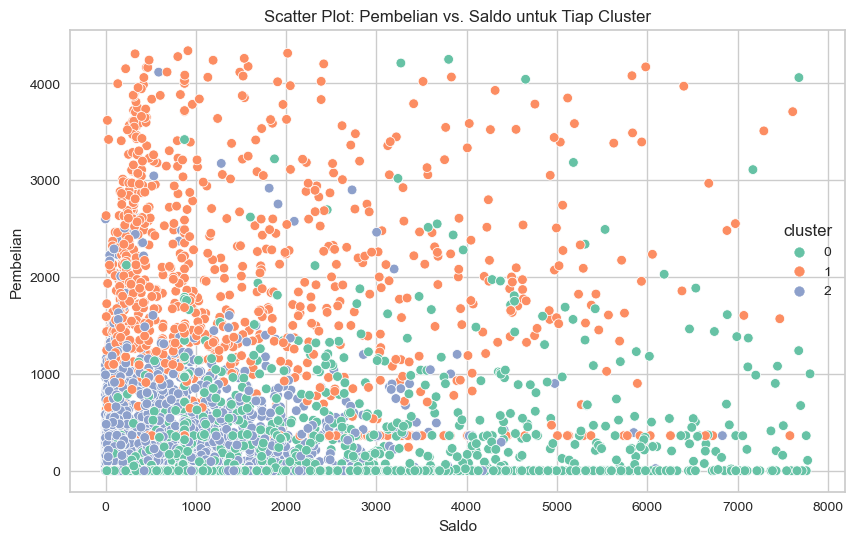

In [48]:
# Visualisasi after clustering 3: Pembelian vs. Saldo untuk Tiap Cluster

plt.figure(figsize=(10, 6))
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='cluster', data=df, palette='Set2')
plt.title('Scatter Plot: Pembelian vs. Saldo untuk Tiap Cluster')
plt.xlabel('Saldo')
plt.ylabel('Pembelian')
plt.show()

Dari scatterplot ini, terlihat bahwa pembelian terendah banyak terdapat pada cluster 0 (warna hijau). Sedangkan, saldo terendah didominasi oleh cluster 1 (warna orange), padahal cluster 1 juga terlihat melakukan pembelian terbanyak dibandingkan cluster lain.

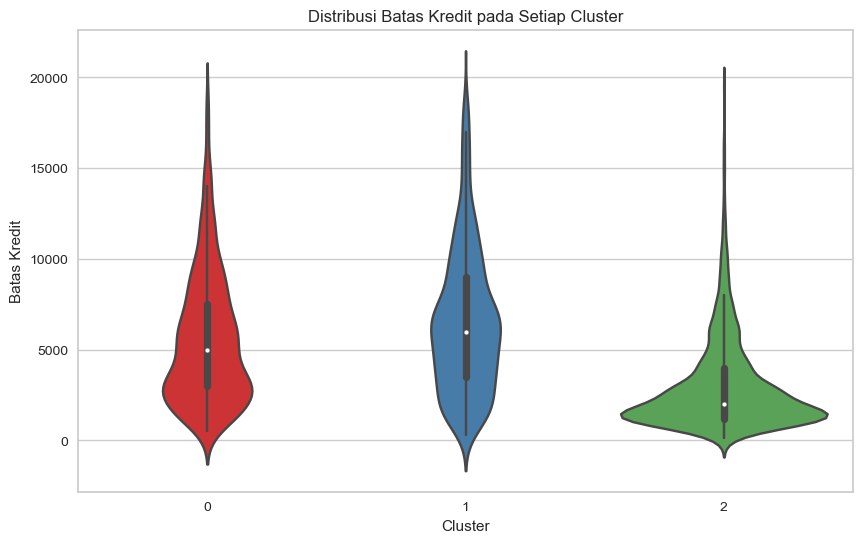

In [49]:
# Visualisasi after clustering 4: Distribusi Batas Kredit pada Setiap Cluster

plt.figure(figsize=(10, 6))
sns.violinplot(x='cluster', y='CREDIT_LIMIT', data=df, palette='Set1')
plt.title('Distribusi Batas Kredit pada Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Batas Kredit')
plt.show()

Dari violin plot ini, terlihat bahwa :
- Pada cluster 0 credit limitnya dominan pada rentang 0-5000 yang cukup melebar.
- Pada cluster 1 credit limitnya dominan pada rentang 3000-5000 yang kurang melebar namun terlihat agak lebar di rentang tersebut.
- Pada cluster 2 credit limitnya dominan pada rentang 0 - 4000 yang sangat melebar.

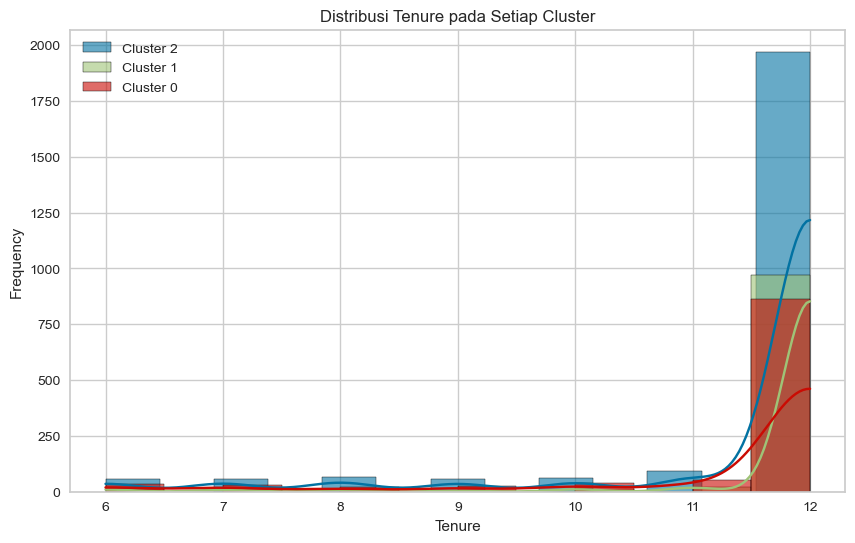

In [50]:
# Visualisasi after clustering 5: Distribusi Tenure pada Setiap Cluster
plt.figure(figsize=(10, 6))
for cluster in df['cluster'].unique():
    sns.histplot(df[df['cluster'] == cluster]['TENURE'], label=f'Cluster {cluster}', kde=True, alpha=0.6)
plt.title('Distribusi Tenure pada Setiap Cluster')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Dari histplot diatas menunjukkan bahwa tenure baik di cluster 0, 1, maupun 2 dominan di angka 12.

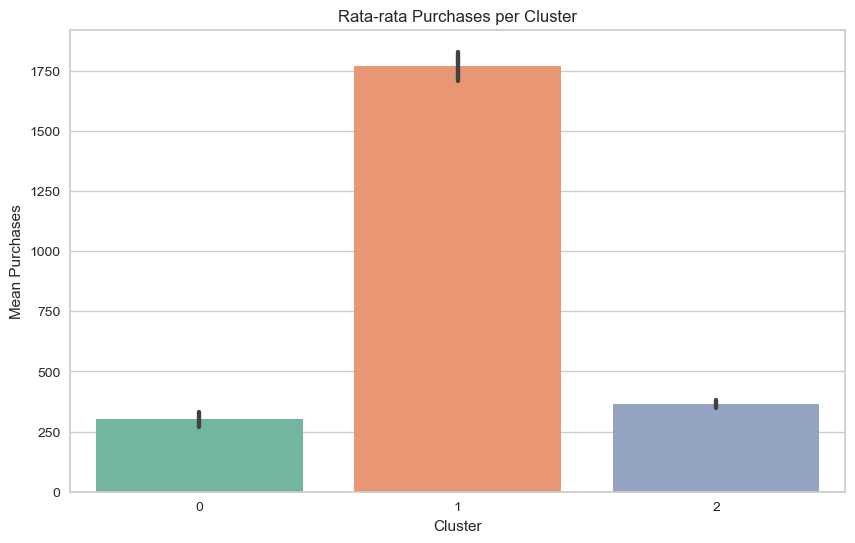

In [51]:
# Visualisasi after clustering 6: Rata-rata Purchases per Cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='PURCHASES', data=df, palette='Set2', estimator=np.mean)
plt.title('Rata-rata Purchases per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Purchases')
plt.show()

Sesuai dengan scatterplot sebelumnya, cluster 1 memang memiliki rata-rata purchase tertinggi dibandingkan cluster lainnya.

# x. Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [52]:
# Save file model 
with open('model.pkl', 'wb') as file_1: 
  pickle.dump(km, file_1)

# Save file hasil model scaler
with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

# Save file hasil pca
with open('pca.pkl', 'wb') as file_3:
  pickle.dump(pca, file_3)

# Save file teks num_col
with open('num_col.txt', 'w') as file_4:
  json.dump(num_cols, file_4)

# Save file teks cat_col
with open('cat_col.txt', 'w') as file_5:
  json.dump(cat_cols, file_5)

# save file teks num_cols_nonmulti
with open('num_cols_nonmulti.txt', 'w') as file_6:
  json.dump(num_cols_nonmulti, file_6)

# xi. Model Inference (different notebook)
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Terdapat dalam notebook "model_inference.ipynb"

# xii. Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## Kesimpulan secara keseluruhan
Customer segmentation berdasarkan cluster yang telah dibuat:

**1. Segmentasi Pelanggan Berdasarkan Penggunaan Kartu Kredit:** Cluster 0 terdiri dari pelanggan dengan saldo tinggi namun pembelian yang relatif rendah, sementara Cluster 1 memiliki saldo yang sedang dengan pembelian yang cukup tinggi. Ini menunjukkan bahwa Cluster 0 mungkin lebih berhati-hati dalam pengeluaran mereka, sementara Cluster 1 cenderung lebih aktif dalam menggunakan kartu kredit mereka.

**2. Pola Pembayaran dan Keteraturan:** Cluster 0 dan 1 menunjukkan pola pembayaran yang lebih tinggi dibandingkan dengan Cluster 2. Hal ini menunjukkan bahwa pelanggan di Cluster 0 dan 1 lebih disiplin dalam melakukan pembayaran, sementara pelanggan di Cluster 2 mungkin memiliki kecenderungan untuk melakukan pembayaran yang lebih rendah atau tidak teratur.

**3. Kapasitas dan Keterbatasan Keuangan:** Cluster 0 memiliki batas kredit yang lebih tinggi daripada Cluster 1 dan 2. Ini menunjukkan bahwa pelanggan di Cluster 0 mungkin memiliki kapasitas keuangan yang lebih besar atau telah diberikan penawaran kredit yang lebih besar oleh bank. Di sisi lain, Cluster 2 memiliki batas kredit yang lebih rendah, yang mungkin menunjukkan bahwa mereka memiliki keterbatasan keuangan atau merupakan pelanggan baru dengan kredit yang lebih rendah.

**4. Masa Layanan Kartu Kredit:** Meskipun tidak ada perbedaan yang signifikan dalam masa layanan kartu kredit antara cluster, namun rata-rata masa layanan kartu kredit untuk semua cluster adalah relatif tinggi (lebih dari angka 11 (bulan)). Ini menunjukkan bahwa sebagian besar pelanggan telah menggunakan kartu kredit mereka untuk jangka waktu yang cukup lama.

## Business Insight

Berdasarkan hasil segmentasi pelanggan menggunakan kartu kredit, Bank dapat melakukan:

**1. Edukasi Keuangan:** Bank dapat menyediakan program edukasi keuangan kepada pelanggan dalam Cluster 0 untuk membantu mereka mengoptimalkan pengeluaran mereka dengan mempertahankan saldo tinggi tetapi meningkatkan aktivitas pembelian yang sesuai dengan kebutuhan mereka.

**2. Promosi Produk dan Penawaran:** Untuk Cluster 1, bank dapat menargetkan promosi produk atau penawaran khusus yang sesuai dengan pola pembelian tinggi pelanggan. Ini dapat meningkatkan loyalitas dan penggunaan kartu kredit.

**3. Manajemen Risiko dan Penilaian Kredit:** Cluster 2 mungkin membutuhkan penilaian risiko kredit yang lebih hati-hati karena memiliki batas kredit yang lebih rendah. Bank perlu memastikan bahwa mereka menawarkan produk dan layanan yang sesuai dengan profil risiko dan kebutuhan keuangan pelanggan di cluster ini.

**4. Pengembangan Produk yang Sesuai:** Berdasarkan pada variasi batas kredit, bank dapat mengembangkan produk dan layanan yang lebih sesuai untuk setiap cluster. Misalnya, produk pinjaman atau kartu kredit dengan batas kredit yang disesuaikan dengan kebutuhan dan kapasitas keuangan masing-masing pelanggan.

**5. Peningkatan Retensi Pelanggan:** Dengan memperhatikan rata-rata masa layanan kartu kredit yang relatif tinggi untuk semua cluster, bank dapat fokus pada strategi retensi pelanggan, termasuk program loyalitas dan peningkatan pengalaman pelanggan, untuk mempertahankan hubungan jangka panjang dengan pelanggan yang ada.

## Further Improvement

Dalam pembuatan model clustering yang lebih baik, berikut adalah hal-hal yang saya sarankan:
1. **Eksplorasi Feature Tambahan:** Selain fitur-fitur yang telah dipilih, mungkin perlu melakukan eksplorasi terhadap fitur tambahan atau fitur turunan yang dapat memberikan wawasan tambahan tentang perilaku pelanggan. Misalnya, mencoba membuat fitur baru berdasarkan pola pembelian atau kecenderungan pembayaran.

2. **Eksplorasi Visualisasi yang Lebih Lanjut:** Selain visualisasi yang telah dilakukan, juga dapat melakukan visualisasi feature-feature lainnya untuk menemukan insight lebih dalam.

## Conceptual Problems

1. **Apakah yang dimaksud dengan inertia pada algoritma K-Means ?**
Inertia dalam algoritma K-Means merujuk pada kemampuan model untuk memprediksi data baru yang tidak termasuk dalam data latihannya. Ini adalah sebuah metrik yang digunakan untuk mengevaluasi kinerja model clustering, yang dapat digunakan untuk menentukan jumlah cluster yang optimal. Inertia yang lebih kecil menunjukkan bahwa model lebih baik dalam memprediksi data baru. Source: https://blog.sanbercode.com/docs/materi-eda/clustering/

2. **Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !**
- Elbow method adalah metode untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means. Metode ini menggunakan inertia sebagai metrik untuk mengevaluasi kinerja model clustering.
- Alasan penggunaan Elbow method:
    - Mudah untuk dipahami dan digunakan.
    - Memungkinkan untuk mengidentifikasi jumlah cluster yang optimal tanpa harus menghitung semua kombinasi k-value.
- Cara penggunaan Elbow method:
    - Iterasi nilai k dari rentang tertentu dan hitung nilai inertia untuk setiap nilai k.
    - Gambar plot k_inertia vs. jumlah cluster.
    - Temukan titik yang menunjukkan pemutaran yang "elbow" pada gambar plot ini. Titik ini menunjukkan jumlah cluster yang optimal
- Kelebihan:
    - Mudah untuk dipahami dan digunakan.
    - Memungkinkan untuk mengidentifikasi jumlah cluster yang optimal tanpa harus menghitung semua kombinasi k-value.
- Kelemahan:
    - Tidak memungkinkan untuk mengidentifikasi jumlah cluster yang optimal dengan tepat dalam setiap kasus.
    - Biasa digunakan untuk mengidentifikasi jumlah cluster dalam skala kecil dan sedang, bukan dalam skala besar.
    - Bersifat subjektif.
- Source:
    - https://towardsdatascience.com/are-you-still-using-the-elbow-method-5d271b3063bd
    - https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/